## This notebook investigates a method to improve the spectrogram SNR and the method of isolating targets from the spectrogram

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from matplotlib.ticker import FuncFormatter
from scipy.stats import mode
import math

### Open Test 2

### Time Domain

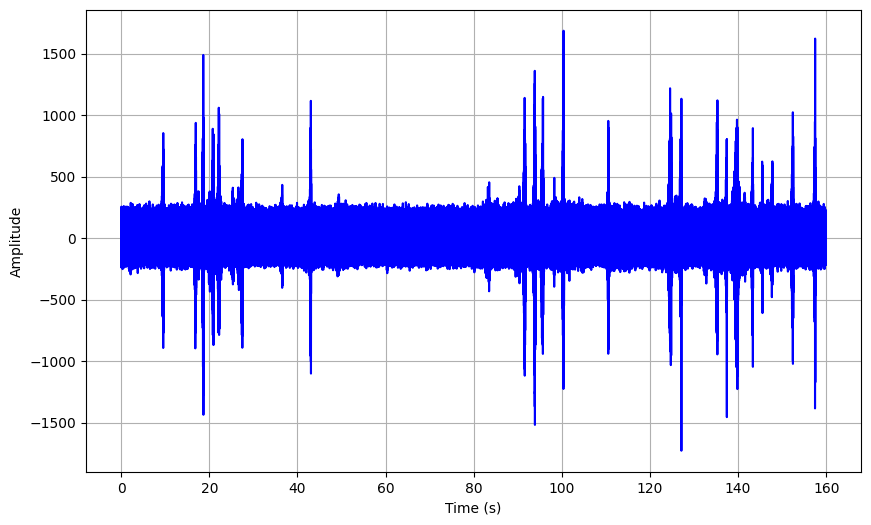

In [30]:
# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file = 'openTest2.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

# Calculate the time values for the x-axis
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the voltage-time graph
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.title('Voltage-Time Plot')
plt.grid(True)
plt.savefig('SoundblasterTimeDomain.pdf', format = 'pdf')
plt.show()

### Spectrogram

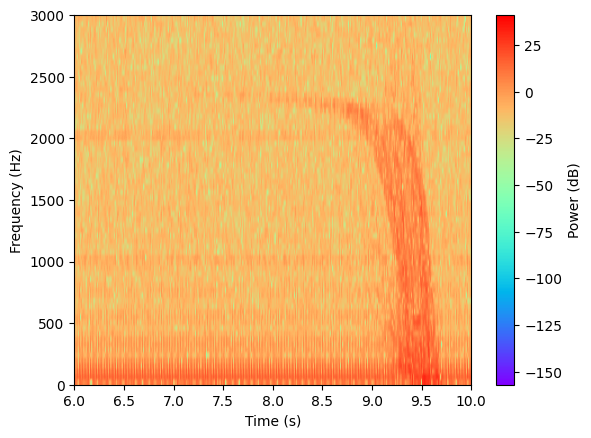

In [71]:
# openTest2 wav file
wav_file = 'openTest2.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

plt.specgram(audio_data, NFFT = 1000, noverlap=500, Fs = sample_rate, cmap = "rainbow")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(0,3000)
plt.xlim(6,10)
plt.colorbar(label = "Power (dB)")
plt.show()


### Same Spectrogram but with variables extracted from specgram function to allow for easy thresholding

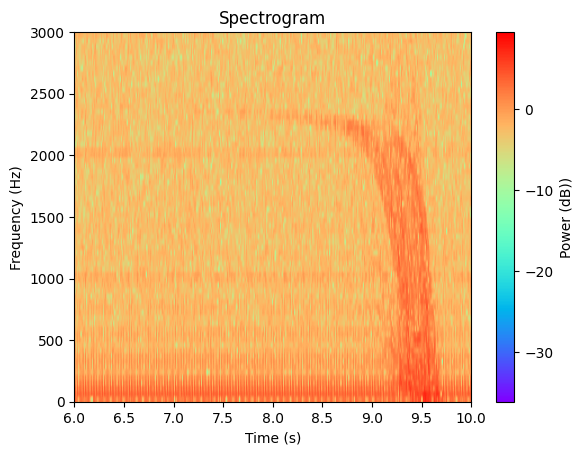

In [72]:
# openTest2 wav file
wav_file = 'openTest2.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

Sxx, frequencies, times, image = plt.specgram(audio_data, NFFT = 1000, noverlap=500, Fs = sample_rate, cmap = "rainbow")
# Plot the spectrogram
plt.title("Spectrogram")
plt.imshow(np.log(Sxx), extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='rainbow', aspect='auto', origin='lower')
plt.colorbar(label='Power (dB))')  # Adding a colorbar
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0,3000)
plt.xlim(6,10)
plt.show()

### Applying Thresholding

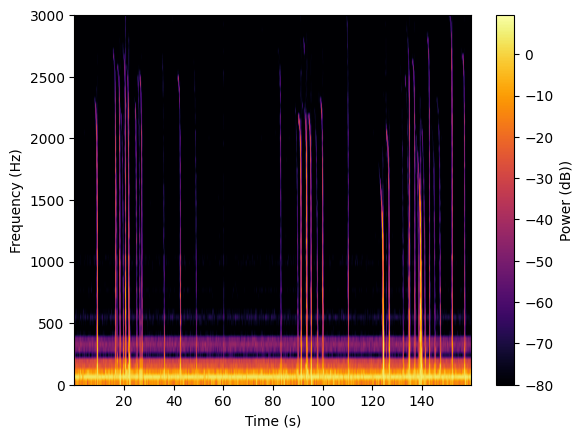

In [105]:
# openTest2 wav file
wav_file = 'openTest2.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

#Define a power threshold 
threshold = 0

Sxx, frequencies, times, image = plt.specgram(audio_data, NFFT = 1000, noverlap=500, Fs = sample_rate)
Sxx = np.log(Sxx)
Sxx_thresholded = np.where(Sxx >= threshold, Sxx, -80) 

# Plot the spectrogram
plt.imshow(Sxx_thresholded, extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='inferno', aspect='auto', origin='lower')
plt.colorbar(label='Power (dB))')  # Adding a colorbar
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0,3000)

plt.show()

[[ 2.27944707e+00  2.76382555e+00  5.24628421e-01 ... -8.00000000e+01
   2.23652191e+00  2.33482833e+00]
 [ 2.59712722e+00  3.42909228e+00  3.04100048e+00 ...  2.06792817e+00
   3.74590425e+00  3.46360604e+00]
 [-8.00000000e+01  3.07521558e+00  2.78139703e+00 ...  4.77640526e-02
   3.73044618e+00  2.23433641e+00]
 ...
 [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ... -8.00000000e+01
  -8.00000000e+01 -8.00000000e+01]
 [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ... -8.00000000e+01
  -8.00000000e+01 -8.00000000e+01]
 [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ... -8.00000000e+01
  -8.00000000e+01 -8.00000000e+01]]


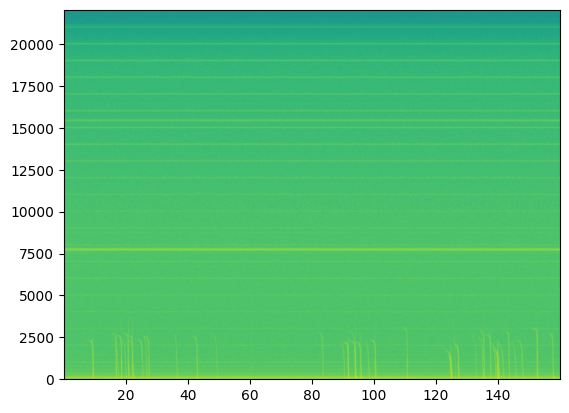

In [106]:
# openTest2 wav file
wav_file = 'openTest2.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

#Define a power threshold 
threshold = 0

Sxx, frequencies, times, image = plt.specgram(audio_data, NFFT = 1000, noverlap=500, Fs = sample_rate)
Sxx = np.log(Sxx)
Sxx_thresholded = np.where(Sxx >= threshold, Sxx, -80) 

print(Sxx_thresholded)